In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('HR_comma_sep.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
# odinal variables can be ranked , if there is odinal variables we can expliciytly map it
# nominal variables have no order

In [4]:
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [5]:
data['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [6]:
data['salary']= data['salary'].map({'low':0 , 'medium':1 , 'high':2})

In [7]:
le = LabelEncoder()
data['Department']= le.fit_transform(data['Department'])
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,0
1,0.80,0.86,5,262,6,0,1,0,7,1
2,0.11,0.88,7,272,4,0,1,0,7,1
3,0.72,0.87,5,223,5,0,1,0,7,0
4,0.37,0.52,2,159,3,0,1,0,7,0
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,0
14995,0.37,0.48,2,160,3,0,1,0,8,0
14996,0.37,0.53,2,143,3,0,1,0,8,0
14997,0.11,0.96,6,280,4,0,1,0,8,0


In [8]:
x= data.drop('left', axis=1)
y=data['left']

In [9]:
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,7,0
1,0.80,0.86,5,262,6,0,0,7,1
2,0.11,0.88,7,272,4,0,0,7,1
3,0.72,0.87,5,223,5,0,0,7,0
4,0.37,0.52,2,159,3,0,0,7,0
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,0
14995,0.37,0.48,2,160,3,0,0,8,0
14996,0.37,0.53,2,143,3,0,0,8,0
14997,0.11,0.96,6,280,4,0,0,8,0


In [10]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [11]:
x.shape

(14999, 9)

In [12]:
y.shape

(14999,)

In [35]:
x_train , x_test, y_train , y_test = train_test_split(x ,y ,test_size=0.3 ,random_state=30)

In [36]:
x_train.shape , y_train.shape

((10499, 9), (10499,))

In [37]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\palla\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_pred=model.predict(x_test)

In [39]:
prediction_table=pd.DataFrame({'True y' : y_test, 'Predicted y': y_pred})
prediction_table

,True y,Predicted y
2463,0,0
6579,0,0
9578,0,0
8174,0,0
20,1,1
...,...,...
9433,0,0
2533,0,0
13375,0,0
739,1,1


In [40]:
model.score(x_test,y_test)

0.7966666666666666

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3172  242]
 [ 673  413]]


Text(33.0, 0.5, 'Predictions')

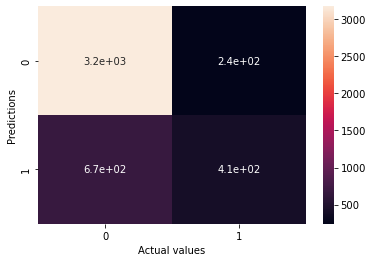

In [43]:
sns.heatmap(cm, annot=True)
plt.xlabel('Actual values')
plt.ylabel('Predictions')

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3414
           1       0.63      0.38      0.47      1086

    accuracy                           0.80      4500
   macro avg       0.73      0.65      0.67      4500
weighted avg       0.78      0.80      0.78      4500



In [ ]:
# root node- represent entire data set
# split node using any one feature of dataset
# using new nodes(child nodes) splt it using another feeature
# terminal node-- a branch having similar feature--no further spliting
# this is how create decition tree
# pruning-- splt chytavara thirich recombine chyna process
# entropy - measure of randomness (similarity illayma) , if entropy is high information gain is low(data set features ethratholam sililar alla)
